### Refresher: Basic SQL Operations in Spark SQL

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan6').getOrCreate()

data = [
    ("James", 34, "M", 3000, 1),
    ("Anna", 28, "F", 4100, 2),
    ("Lee", 23, "M", 2700, 1)]

columns = ["Name", "Age", "Gender", "Salary", "DeptId"]

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView("employees")

spark.sql("SELECT * FROM employees").show()
spark.sql("SELECT Name, Age FROM employees WHERE Salary > 3000").show()
spark.sql("SELECT AVG(Salary) FROM employees").show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### Advanced Queries for Data Analysis

In [2]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



#### Tugas Tambahan

Cari rata-rata gaji per departemen.

In [3]:
spark.sql('''
SELECT DeptId, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

+------+-------------+
|DeptId|AverageSalary|
+------+-------------+
|     1|       2850.0|
|     2|       4100.0|
+------+-------------+



Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.

In [4]:
spark.sql('''
SELECT Name, Age, Gender, Salary
FROM employees
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees AS e
    WHERE e.Gender = employees.Gender
)
''').show()

+-----+---+------+------+
| Name|Age|Gender|Salary|
+-----+---+------+------+
|James| 34|     M|  3000|
+-----+---+------+------+



Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [5]:
spark.sql('''
SELECT Name, Age, Gender, Salary, DeptId,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
''').show()

+-----+---+------+------+------+----------+
| Name|Age|Gender|Salary|DeptId|SalaryRank|
+-----+---+------+------+------+----------+
|James| 34|     M|  3000|     1|         1|
|  Lee| 23|     M|  2700|     1|         2|
| Anna| 28|     F|  4100|     2|         1|
+-----+---+------+------+------+----------+



### Penggunaan Window Functions dan Subqueries

In [6]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### Advanced Spark SQL Queries

In [33]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



#### Tugas Tambahan

Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.

In [34]:
spark.sql('''
SELECT e.Name, e.Age, e.Gender, e.Salary,
       RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank,
       AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AverageSalary,
       d.DeptName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---+------+------+----------+-------------+---------+
| Name|Age|Gender|Salary|SalaryRank|AverageSalary| DeptName|
+-----+---+------+------+----------+-------------+---------+
|James| 34|     M|  3000|         1|       2850.0|       HR|
|  Lee| 23|     M|  2700|         2|       2850.0|       HR|
| Anna| 28|     F|  4100|         1|       4100.0|Marketing|
+-----+---+------+------+----------+-------------+---------+



Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

In [35]:
spark.sql('''
SELECT Name, Age, Salary, DeptId,
       AVG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) AS AvgSalaryByAge
FROM employees
''').show()

+-----+---+------+------+--------------+
| Name|Age|Salary|DeptId|AvgSalaryByAge|
+-----+---+------+------+--------------+
|  Lee| 23|  2700|     1|        2700.0|
|James| 34|  3000|     1|        2850.0|
| Anna| 28|  4100|     2|        4100.0|
+-----+---+------+------+--------------+



### Advanced Data Analysis and Visualization

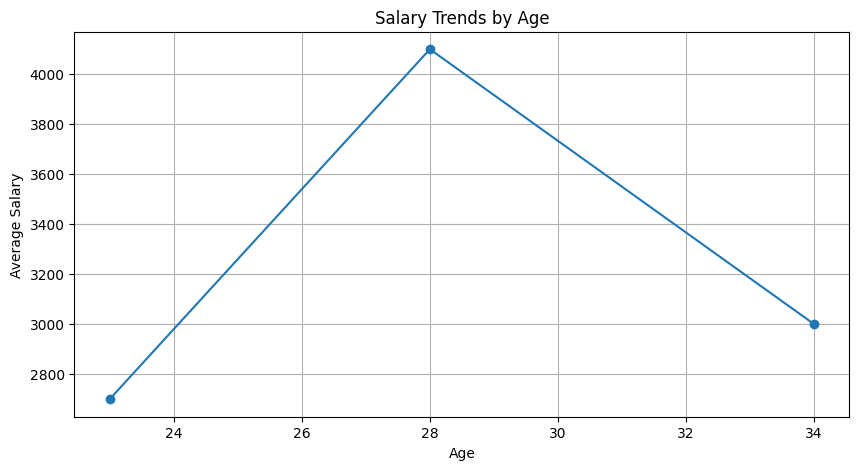

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

#### Tugas

Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.

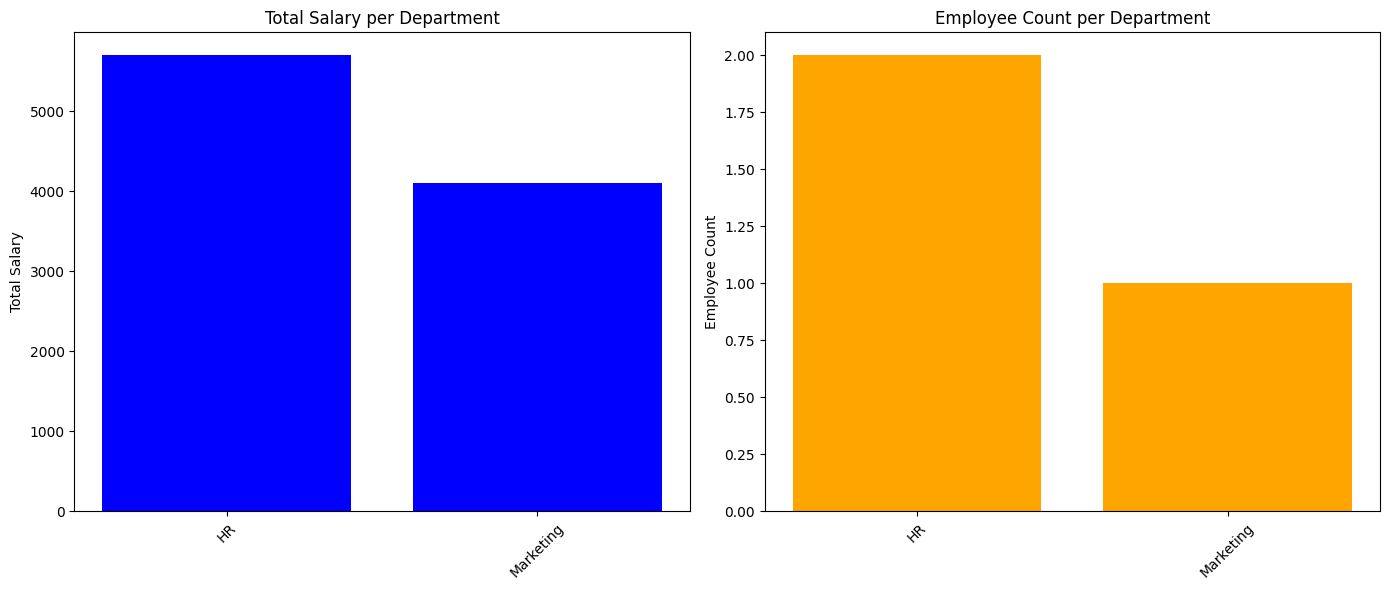

In [37]:
import matplotlib.pyplot as plt

# Menghitung total gaji dan jumlah karyawan per departemen
total_salary_per_dept = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

# Mengambil data ke dalam Pandas DataFrame untuk visualisasi
df = total_salary_per_dept.toPandas()

# Membuat figure dan subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Membuat bar plot untuk total gaji per departemen
axs[0].bar(df['DeptName'], df['TotalSalary'], color='blue')
axs[0].set_ylabel('Total Salary')
axs[0].set_title('Total Salary per Department')
axs[0].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih jelas

# Membuat bar plot untuk jumlah karyawan per departemen
axs[1].bar(df['DeptName'], df['EmployeeCount'], color='orange')
axs[1].set_ylabel('Employee Count')
axs[1].set_title('Employee Count per Department')
axs[1].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih jelas

# Menyesuaikan layout agar tidak ada tumpang tindih
plt.tight_layout()
plt.show()

Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart

In [41]:
#Hitung rata-rata gaji berdasarkan kelompok usia
avg_salary_by_age = spark.sql('''
    SELECT Age, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Age
''')

# Membuat view untuk gaji rata-rata
avg_salary_by_age.createOrReplaceTempView('avg_salary_by_age')

# Temukan karyawan dengan gaji di atas rata-rata dalam kelompok usia mereka
high_salary_employees = spark.sql('''
    SELECT e.Name, e.Age, e.Salary
    FROM employees e
    JOIN avg_salary_by_age a ON e.Age = a.Age
    WHERE e.Salary > a.AvgSalary
''')

# Konversi hasil ke Pandas DataFrame untuk visualisasi
high_salary_df = high_salary_employees.toPandas()

# Visualisasi hasil
if not high_salary_df.empty:
    # Membuat grafik batang untuk menunjukkan karyawan dengan gaji di atas rata-rata
    plt.figure(figsize=(10, 6))
    plt.bar(high_salary_df['Name'], high_salary_df['Salary'], color='skyblue')
    plt.xlabel('Name')
    plt.ylabel('Salary')
    plt.title('Employees with Salary Above Average by Age Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada karyawan dengan gaji di atas rata-rata dalam kelompok usia.")

Tidak ada karyawan dengan gaji di atas rata-rata dalam kelompok usia.


Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.

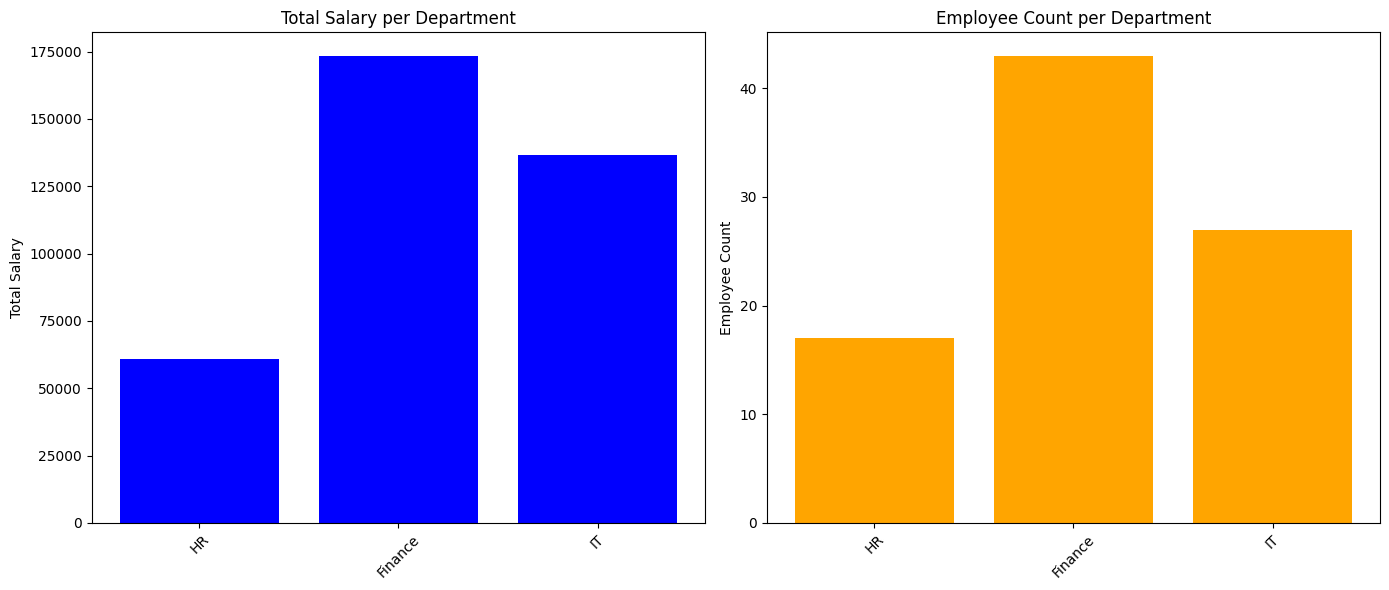

In [31]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi Spark
spark = SparkSession.builder.appName('HandsOnPertemuan6').getOrCreate()

# Data karyawan
data_employees = [
    ("James", 34, "M", 3000, 1), ("Anna", 28, "F", 4100, 2), ("Lee", 23, "M", 2700, 1),
    ("Michael", 45, "M", 5000, 3), ("Sarah", 32, "F", 3900, 2), ("John", 29, "M", 3200, 1),
    ("Jessica", 26, "F", 4500, 2), ("David", 38, "M", 4800, 3), ("Linda", 30, "F", 3100, 2),
    ("Tom", 25, "M", 2700, 1), ("Mary", 31, "F", 4200, 2), ("Robert", 42, "M", 5200, 3),
    ("Emily", 27, "F", 4100, 2), ("Daniel", 24, "M", 2900, 1), ("Laura", 33, "F", 3700, 2),
    ("James", 35, "M", 3300, 1), ("Olivia", 29, "F", 4000, 2), ("William", 41, "M", 5100, 3),
    ("Sophia", 28, "F", 4300, 2), ("Matthew", 36, "M", 4900, 3), ("Ava", 26, "F", 4400, 2),
    ("Christopher", 39, "M", 5500, 3), ("Isabella", 31, "F", 3900, 2), ("James", 34, "M", 3000, 1),
    ("Charlotte", 30, "F", 3700, 2), ("Joseph", 27, "M", 3600, 1), ("Amelia", 32, "F", 3800, 2),
    ("Ethan", 44, "M", 5400, 3), ("Mia", 29, "F", 4300, 2), ("Joshua", 25, "M", 2800, 1),
    ("Sofia", 34, "F", 4500, 2), ("Alexander", 40, "M", 5100, 3), ("Harper", 28, "F", 4600, 2),
    ("Daniel", 36, "M", 4700, 3), ("Ella", 31, "F", 3900, 2), ("Michael", 30, "M", 4000, 1),
    ("Abigail", 27, "F", 4300, 2), ("Matthew", 35, "M", 5000, 3), ("Madison", 24, "F", 3100, 2),
    ("Joseph", 38, "M", 5500, 3), ("Aria", 33, "F", 3800, 2), ("James", 45, "M", 5300, 1),
    ("Grace", 29, "F", 3900, 2), ("Samuel", 37, "M", 4900, 3), ("Victoria", 30, "F", 4200, 2),
    ("Henry", 42, "M", 5600, 3), ("Scarlett", 28, "F", 4400, 2), ("David", 36, "M", 4700, 3),
    ("Hannah", 25, "F", 3100, 2), ("James", 31, "M", 3500, 1), ("Lily", 34, "F", 4000, 2),
    ("Robert", 28, "M", 4600, 3), ("Zoey", 32, "F", 3700, 2), ("Lucas", 39, "M", 4900, 3),
    ("Nora", 29, "F", 4300, 2), ("Anthony", 45, "M", 5200, 1), ("Chloe", 33, "F", 4100, 2),
    ("Jonathan", 26, "M", 3000, 1), ("Stella", 38, "F", 4500, 2), ("Isaac", 35, "M", 4900, 3),
    ("Avery", 30, "F", 3700, 2), ("Caleb", 37, "M", 4800, 3), ("Samantha", 28, "F", 4300, 2),
    ("Michael", 29, "M", 3600, 1), ("Addison", 32, "F", 3800, 2), ("Jacob", 43, "M", 5100, 3),
    ("Aria", 31, "F", 3900, 2), ("Ethan", 40, "M", 5400, 3), ("Sophia", 27, "F", 4400, 2),
    ("Elijah", 34, "M", 4700, 3), ("Camila", 30, "F", 4200, 2), ("Gabriel", 36, "M", 4900, 3),
    ("Layla", 29, "F", 4500, 2), ("Oliver", 42, "M", 5300, 1), ("Riley", 28, "F", 4100, 2),
    ("Sebastian", 37, "M", 5600, 3), ("Lucy", 30, "F", 3900, 2), ("Andrew", 39, "M", 5100, 3),
    ("Maya", 26, "F", 4000, 2), ("Dylan", 35, "M", 5000, 3), ("Ariana", 28, "F", 4300, 2),
    ("Kevin", 36, "M", 4800, 3), ("Claire", 31, "F", 3700, 2), ("Isaiah", 29, "M", 3600, 1),
    ("Sofia", 32, "F", 4100, 2), ("Zachary", 41, "M", 5500, 3), ("Luna", 28, "F", 4200, 2)
]

columns_employees = ["Name", "Age", "Gender", "Salary", "DeptId"]

# Buat DataFrame untuk karyawan
df_employees = spark.createDataFrame(data_employees, schema=columns_employees)
df_employees.createOrReplaceTempView("employees")

# Data departemen
data_departments = [
    (1, "HR"), (2, "Finance"), (3, "IT")
]
columns_departments = ["DeptId", "DeptName"]

# Buat DataFrame untuk departemen
df_departments = spark.createDataFrame(data_departments, schema=columns_departments)
df_departments.createOrReplaceTempView("departments")

# Analisis SQL

# 1. Hitung total gaji dan jumlah karyawan berdasarkan departemen
result_dept = spark.sql("""
   SELECT d.DeptName, COUNT(e.Name) AS TotalEmployees, SUM(e.Salary) AS TotalSalary
   FROM employees e
   JOIN departments d ON e.DeptId = d.DeptId
   GROUP BY d.DeptName
""").toPandas()

# 2. Hitung rata-rata gaji per gender
result_gender = spark.sql("""
   SELECT Gender, AVG(Salary) AS AverageSalary
   FROM employees
   GROUP BY Gender
""").toPandas()

# Visualisasi Data
# Membuat figure dan subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Membuat bar plot untuk total gaji per departemen
axs[0].bar(result_dept['DeptName'], result_dept['TotalSalary'], color='blue')
axs[0].set_ylabel('Total Salary')
axs[0].set_title('Total Salary per Department')
axs[0].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih jelas

# Membuat bar plot untuk jumlah karyawan per departemen
axs[1].bar(result_dept['DeptName'], result_dept['TotalEmployees'], color='orange')
axs[1].set_ylabel('Employee Count')
axs[1].set_title('Employee Count per Department')
axs[1].tick_params(axis='x', rotation=45)  # Memutar label sumbu x agar lebih jelas

# Menyesuaikan layout agar tidak ada tumpang tindih
plt.tight_layout()
plt.show()